In [1]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_score

%matplotlib inline

In [2]:
# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display

In [3]:
# Columns contain the data headers and responses contains the actual data
columns = pd.read_csv(r'/Users/jaimin/Documents/Kaggle/young-people-survey/columns.csv')
young = pd.read_csv(r'/Users/jaimin/Documents/Kaggle/young-people-survey/responses.csv')


In [4]:
young.describe()


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

In [5]:
var_of_interest = 'Village - town'
mapping = {var_of_interest: {'city': 0, 'village': 1}}
young.dropna(subset=[var_of_interest], inplace=True)
# to be able to use hue parameter for better comparison in seaborn
young["all"] = ""

In [6]:
# var_of_interest = 'Smoking'
# mapping = {var_of_interest: {'never smoked': 0, 'tried smoking': 1, 'former smoker': 2, 'current smoker': 3}}
# young.dropna(subset=[var_of_interest], inplace=True)
# to be able to use hue parameter for better comparison in seaborn
# young["all"] = ""

(array([0, 1]), <a list of 2 Text yticklabel objects>)

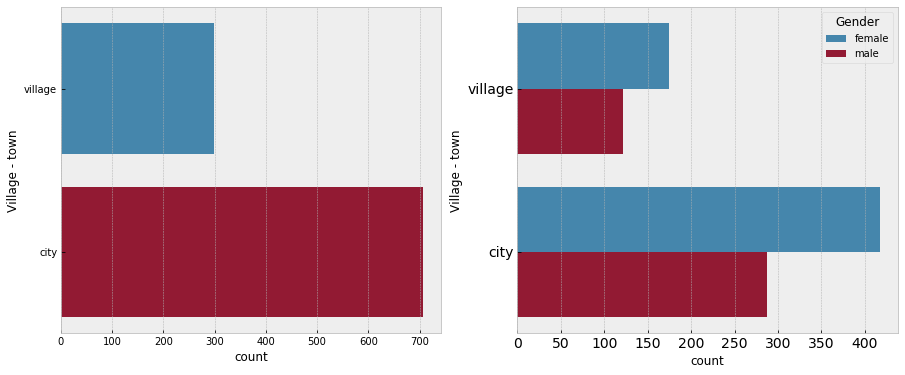

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.countplot(y=var_of_interest, data=young, ax=ax[0])
sns.countplot(y=var_of_interest, hue='Gender', data=young, ax=ax[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

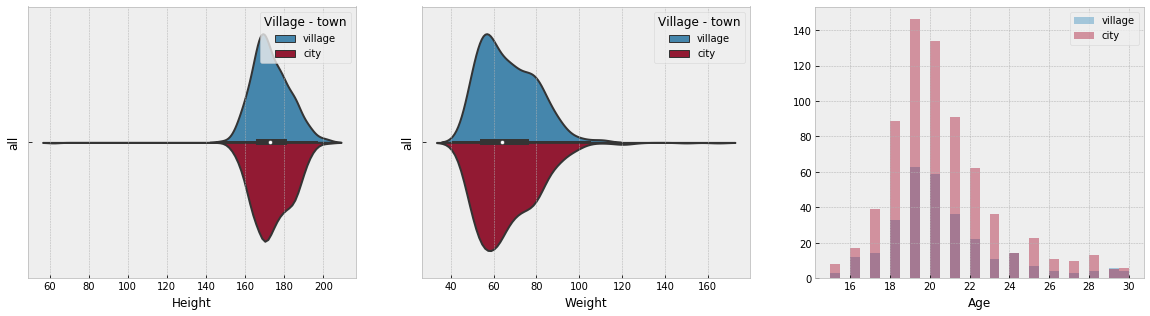

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
data = young.dropna(subset=['Height'])
sns.violinplot(x='Height', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[0]);
data = young.dropna(subset=['Weight'])
sns.violinplot(x='Weight', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[1]);

var_of_int_ser = young[var_of_interest]
sns.distplot(young[var_of_int_ser=='village'].Age.dropna(),
             label='village', ax=ax[2], kde=False, bins=30);

sns.distplot(young[var_of_int_ser=='city'].Age.dropna(),
             label='city', ax=ax[2], kde=False, bins=30);
ax[2].legend()

In [9]:
display(young[young['Height']<70][['Age', 'Height', 'Weight', 'Gender', var_of_interest]])
display(young[young['Weight']>120][['Age', 'Height', 'Weight', 'Gender', var_of_interest]])

,Age,Height,Weight,Gender,Village - town
676,20.0,62.0,55.0,female,city


,Age,Height,Weight,Gender,Village - town
859,20.0,190.0,125.0,male,city
885,23.0,NaN,165.0,female,city
992,30.0,200.0,150.0,male,city


In [10]:
young.drop([676,885,992, 859], inplace = True)


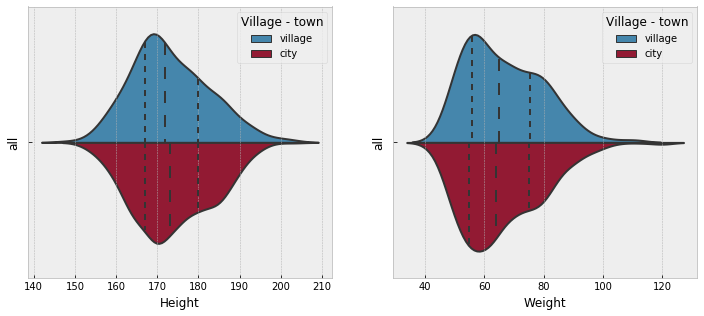

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
data = young.dropna(subset=['Height'])
sns.violinplot(x='Height', y="all", hue=var_of_interest, data=data, 
                   split=True, ax=ax[0], inner='quartile');

data = young.dropna(subset=['Weight'])
sns.violinplot(x='Weight', y="all", hue=var_of_interest, data=data, 
                   split=True, ax=ax[1], inner='quartile');

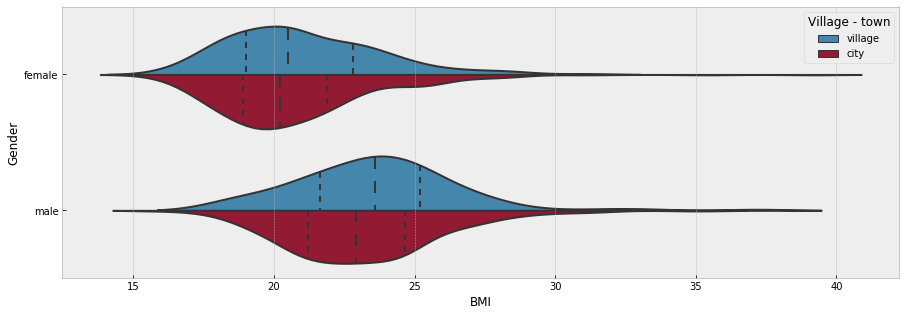

In [12]:
young['BMI'] = round(young['Weight']/((young['Height']/100)**2),1)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
data = young.dropna(subset=['BMI'])
sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data, 
               split=True, inner='quartile', ax=ax);

In [13]:
import scipy.stats as stats
city_bmi = data[data[var_of_interest]=='city'].BMI
village_bmi  = data[data[var_of_interest]=='village'].BMI
t, p = stats.ttest_ind(village_bmi, city_bmi, axis=0, equal_var=False)
print(' t-stat = {t} \n p-value = {p}'.format(t=t,p=p/2))

 t-stat = 1.7734182239050904 
 p-value = 0.03837342374443175


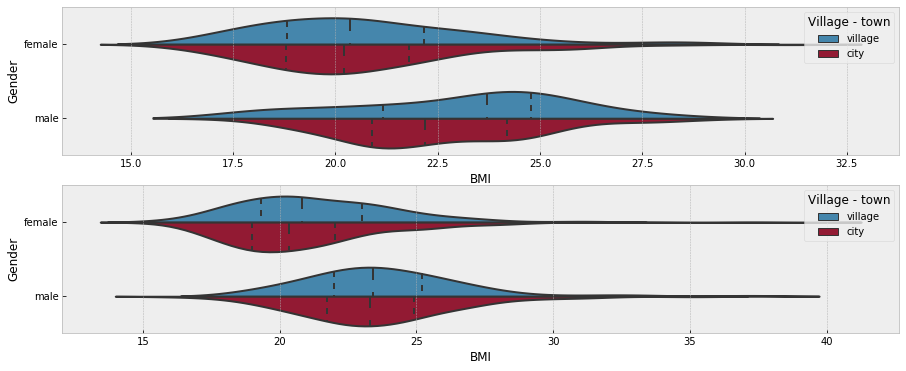

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,6))
data_under = data[data['Age']<20]
data_above = data[data['Age']>=20]
sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data_under, split=True, 
                   inner = 'quartile', ax=ax[0], hue_order=['village', 'city']);
sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data_above, split=True, 
                   inner = 'quartile', ax=ax[1], hue_order=['village', 'city']);

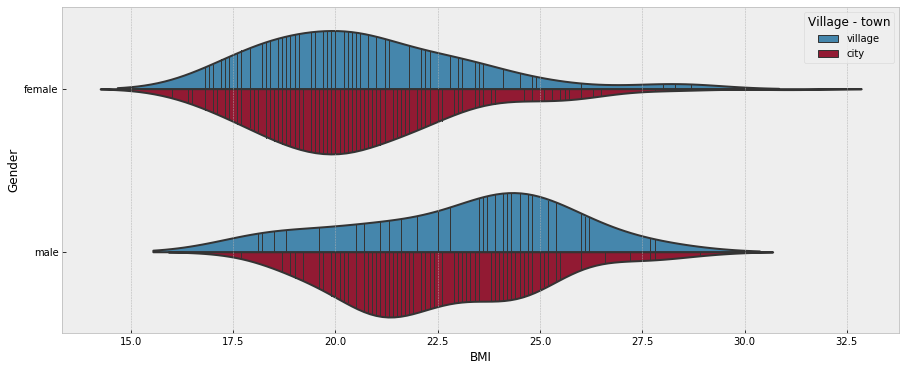

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data_under, 
               split=True, inner='stick', ax=ax, hue_order=['village', 'city']);

In [16]:
def do_ploting(x, y, figsize):
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title("Correlation coefficient of the variables")
    sns.barplot(x=x, y=y, ax=ax)
    ax.set_ylabel("Correlation coefficients")


def correlation_plot(var_of_interest, df_main, mapping, figsize=(10, 30)):
    def calc_corr(var_of_interest, df, cols, figsize):
        lbls = []
        vals = []
        for col in cols:
            lbls.append(col)
            vals.append(np.corrcoef(df[col], df[var_of_interest])[0, 1])
        corrs = pd.DataFrame({'features': lbls, 'corr_values': vals})
        corrs = corrs.sort_values(by='corr_values')
        do_ploting(corrs.corr_values, corrs['features'], figsize)
        return corrs

    #imputing the set
    df = copy.deepcopy(df_main)
    df.replace(mapping, inplace=True)
    mean_values = df.mean(axis=0)
    df.fillna(mean_values, inplace=True)

    #correlating non-categorical varibales
    cols_floats = [col for col in df.columns if df[col].dtype != 'object']
    cols_floats.remove(var_of_interest)
    corrs_one = calc_corr(var_of_interest, df, cols_floats, figsize)

    #correlating categorical variables
    cols_cats = [col for col in df.columns if df[col].dtype == 'object']
    if cols_cats:
        df_dummies = pd.get_dummies(df[cols_cats])
        cols_cats = df_dummies.columns
        df_dummies[var_of_interest] = df[var_of_interest]
        corrs_two = calc_corr(var_of_interest, df_dummies, cols_cats, (5, 10))
    else:
        corrs_two = 0
    return [corrs_one, corrs_two]

/Users/jaimin/miniconda3/envs/survey_env/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/jaimin/miniconda3/envs/survey_env/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


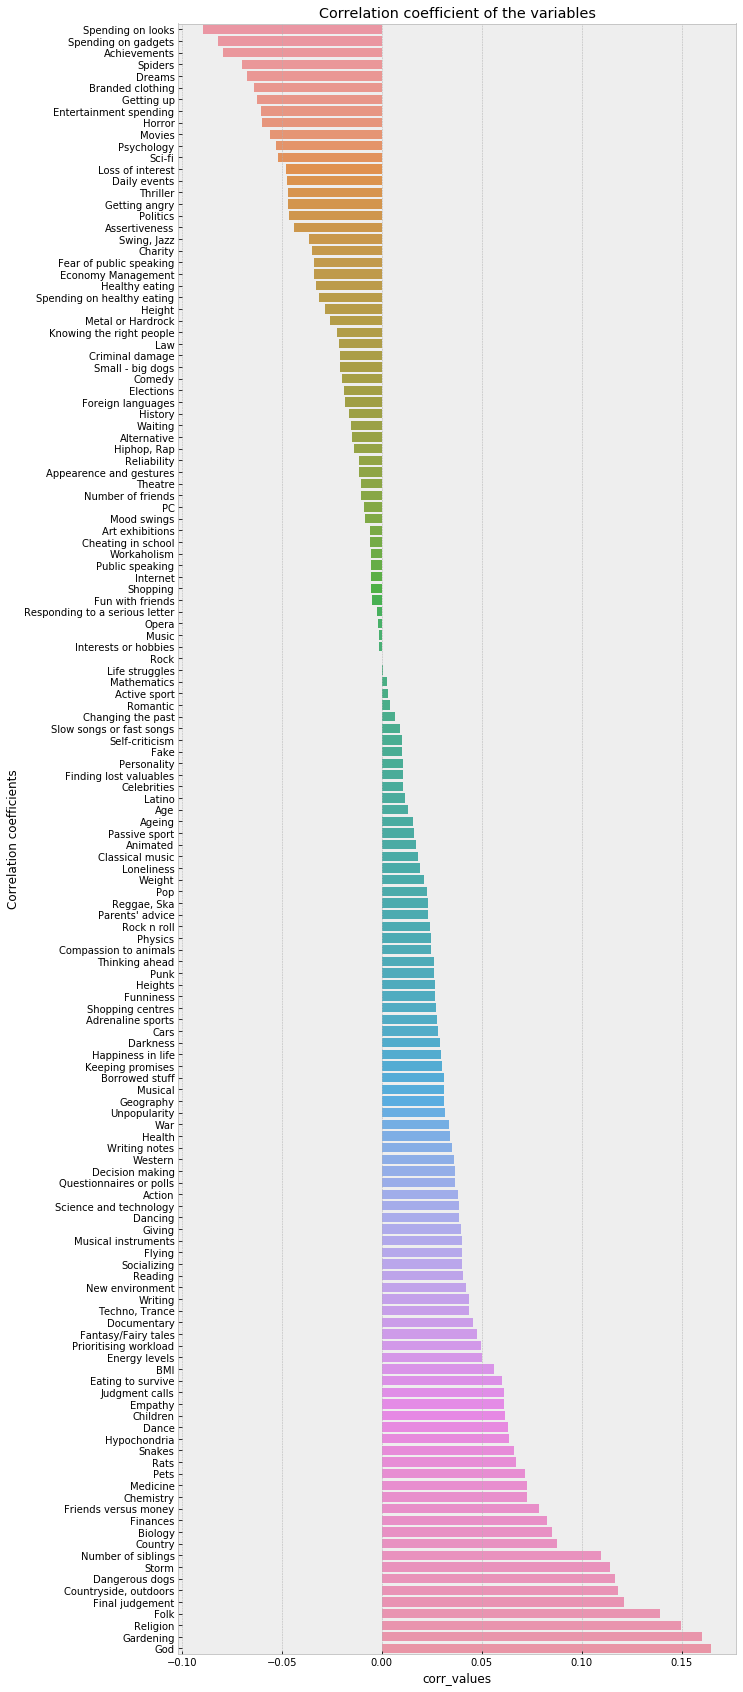

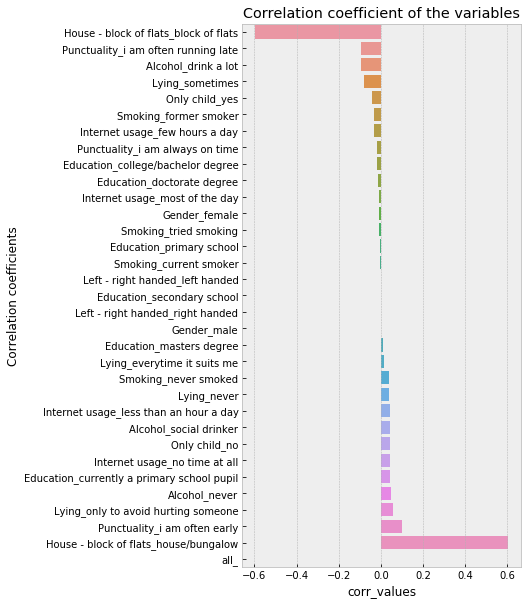

In [17]:
corrs_area = correlation_plot(var_of_interest, young, mapping)

In [3]:
print("HI world")


HI world
